In [1]:
#load packages
import pandas as pd
import numpy as np
from sci378 import *

Version:  0.0.25


In [2]:
#read in data
data=pd.read_csv("allegations_prime.csv")
pre_data=pd.read_csv("NYC_Precincts.csv")

In [3]:
data.head(2)

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,...,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)


In [4]:
pre_data.head(2)

,Prec_Address,Prec_Borough,precinct,Latitude,Longitude
0,16 Ericsson Place,Manhattan,1,40.720371,-74.007072
1,19 Elizabeth Street,Manhattan,5,40.716179,-73.997490


In [5]:
pre_data.dtypes

Prec_Address      object
Prec_Borough      object
precinct           int64
Latitude         float64
Longitude        float64
dtype: object

In [6]:
#data['precinct'] = data['precinct'].astype(str).str.replace('.0', '')
#pre_data['precinct'] = pre_data['precinct'].astype(str)

In [7]:
#joining precinct locations
df = pd.merge(data, pre_data, on=['precinct'], how= 'left')
df.head(2)

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition,Prec_Address,Prec_Borough,Latitude,Longitude
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,...,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions),65 6th Avenue,Brooklyn,40.680572,-73.974312
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges),2820 Snyder Avenue,Brooklyn,40.648688,-73.950335


In [8]:
len(df)

33358

In [9]:
df.isnull().sum()

unique_mos_id                  0
first_name                     0
last_name                      0
command_now                    0
shield_no                      0
complaint_id                   0
month_received                 0
year_received                  0
month_closed                   0
year_closed                    0
command_at_incident         1544
rank_abbrev_incident           0
rank_abbrev_now                0
rank_now                       0
rank_incident                  0
mos_ethnicity                  0
mos_gender                     0
mos_age_incident               0
complainant_ethnicity       4464
complainant_gender          4195
complainant_age_incident    4812
fado_type                      0
allegation                     1
precinct                      24
contact_reason               199
outcome_description           56
board_disposition              0
Prec_Address                  48
Prec_Borough                  48
Latitude                      48
Longitude 

In [10]:
# concatenate month and year and assign 01 to the day to get a date column
df['date_received'] = pd.to_datetime(df.year_received.astype(str) + '/' + df.month_received.astype(str) + '/01')
df['date_closed'] = pd.to_datetime(df.year_closed.astype(str) + '/' + df.month_closed.astype(str) + '/01')

In [11]:
# replace black by african american and null with unknown
# replace null in gender to unknown
# replace null in outcome description to unknown
# replace null in allegation to unknown
# replace null in location and address to unknown
df['complainant_ethnicity'] = df['complainant_ethnicity'].replace([np.nan, 'Black'], ['Unknown', 'African American'])
df['mos_ethnicity'] = df['mos_ethnicity'].replace(['Black'], ['African American'])
df['complainant_gender'] = df['complainant_gender'].replace([np.nan], ['Unknown'])
df['outcome_description'] = df['outcome_description'].replace([np.nan], ['Unknown'])
df['allegation'] = df['allegation'].replace([np.nan], ['Unknown'])
df['Prec_Borough '] = df['Prec_Borough '].replace([np.nan], ['Unknown'])
df['Prec_Address'] = df['Prec_Address'].replace([np.nan], ['Unknown'])

In [12]:
df.isnull().sum()

unique_mos_id                  0
first_name                     0
last_name                      0
command_now                    0
shield_no                      0
complaint_id                   0
month_received                 0
year_received                  0
month_closed                   0
year_closed                    0
command_at_incident         1544
rank_abbrev_incident           0
rank_abbrev_now                0
rank_now                       0
rank_incident                  0
mos_ethnicity                  0
mos_gender                     0
mos_age_incident               0
complainant_ethnicity          0
complainant_gender             0
complainant_age_incident    4812
fado_type                      0
allegation                     0
precinct                      24
contact_reason               199
outcome_description            0
board_disposition              0
Prec_Address                   0
Prec_Borough                   0
Latitude                      48
Longitude 

In [13]:
# clean contact_reason column using 80 - 20 rule

def reason_for_contact(contact_reason):
    if isinstance(contact_reason, str): 
        if any(keyword in contact_reason for keyword in ['aided','Aided']):
            return 'Aided Case'
        elif any(keyword in contact_reason for keyword in ['suspected']):
            return 'PD suspected Violation/Crime'
        elif any(keyword in contact_reason for keyword in ['Traffic','Parking', 'VTL']):
            return 'Vehicle/Traffic Violation'
        elif any(keyword in contact_reason for keyword in ['Report','report']):
            return 'Report of Violation/Crime'
        elif any(keyword in contact_reason for keyword in ['arrest', 'Arrest', 'warrant']):
            return 'Execution of Arrest/Warrant'
        elif 'Moving violation' in contact_reason:
            return 'Moving Violation'
        else:
            return 'Other'
    else:
        return None
df['reason_for_contact'] = df['contact_reason'].apply(reason_for_contact)
df.head()

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,contact_reason,outcome_description,board_disposition,Prec_Address,Prec_Borough,Latitude,Longitude,date_received,date_closed,reason_for_contact
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,...,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions),65 6th Avenue,Brooklyn,40.680572,-73.974312,2019-07-01,2020-05-01,Report of Violation/Crime
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,Moving violation,Moving violation summons issued,Substantiated (Charges),2820 Snyder Avenue,Brooklyn,40.648688,-73.950335,2011-11-01,2012-08-01,Moving Violation
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,Moving violation,Moving violation summons issued,Substantiated (Charges),2820 Snyder Avenue,Brooklyn,40.648688,-73.950335,2011-11-01,2012-08-01,Moving Violation
3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,...,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges),2820 Snyder Avenue,Brooklyn,40.648688,-73.950335,2012-07-01,2013-09-01,PD suspected Violation/Crime
4,10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,...,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A),2820 Snyder Avenue,Brooklyn,40.648688,-73.950335,2018-08-01,2019-02-01,Report of Violation/Crime


In [14]:
df.isnull().sum()

unique_mos_id                  0
first_name                     0
last_name                      0
command_now                    0
shield_no                      0
complaint_id                   0
month_received                 0
year_received                  0
month_closed                   0
year_closed                    0
command_at_incident         1544
rank_abbrev_incident           0
rank_abbrev_now                0
rank_now                       0
rank_incident                  0
mos_ethnicity                  0
mos_gender                     0
mos_age_incident               0
complainant_ethnicity          0
complainant_gender             0
complainant_age_incident    4812
fado_type                      0
allegation                     0
precinct                      24
contact_reason               199
outcome_description            0
board_disposition              0
Prec_Address                   0
Prec_Borough                   0
Latitude                      48
Longitude 

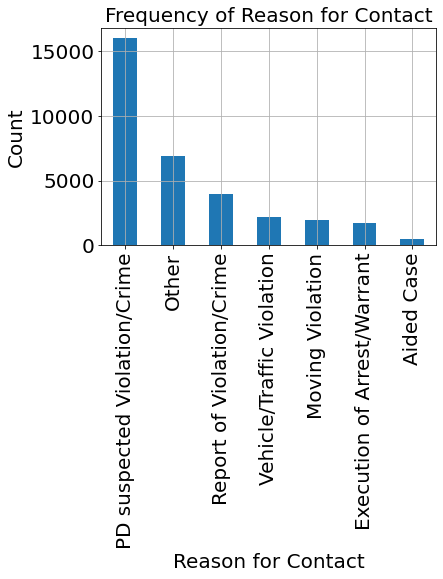

In [15]:
df['reason_for_contact'].value_counts().plot(kind='bar')
plt.xlabel('Reason for Contact')
plt.ylabel('Count')
plt.title('Frequency of Reason for Contact')
plt.show()

In [16]:
rank_map = {
    
    'Police Officer': 1,
    'Sergeant':3,
    'Detective':2,
    'Lieutenant':6,
    'Deputy Insepector':4,
    'Inspector':5,
    'Captain':7,
    'Chiefs and other ranks':8
}

df['rank_num_now'] = df['rank_now'].map(rank_map)
df['rank_num_incident'] = df['rank_incident'].map(rank_map)


In [17]:
average_difference = (df['rank_num_now'] - df['rank_num_incident']).mean()
print(average_difference)

0.8920580804237314


In [18]:
average_difference_substantiated = (df[df['board_disposition'] == 'Substantiated (Charges)']['rank_num_now'] - df[df['board_disposition'] == 'Substantiated (Charges)']['rank_num_incident']).mean()
print("Charges Average rank change: ",average_difference_substantiated)


Charges Average rank change:  1.0895202358616993


In [19]:
average_difference_substantiated = (df[df['board_disposition'] == 'Unsubstantiated']['rank_num_now'] - df[df['board_disposition'] == 'Unsubstantiated']['rank_num_incident']).mean()
print("Unsubstatinated rank change: ",average_difference_substantiated)


Unsubstatinated rank change:  0.9168309026409145


In [20]:
average_difference_substantiated = (df[df['board_disposition'] == 'Exonerated']['rank_num_now'] - df[df['board_disposition'] == 'Exonerated']['rank_num_incident']).mean()
print("Exonerated rank change: ",average_difference_substantiated)

Exonerated rank change:  0.9292907876603413


In [21]:
average_difference_substantiated = (df[df['board_disposition'] == 'Substantiated (Command Discipline A)']['rank_num_now'] - df[df['board_disposition'] == 'Substantiated (Command Discipline A)']['rank_num_incident']).mean()
print("Discipline A rank change: ",average_difference_substantiated)

Discipline A rank change:  0.3755274261603376


In [22]:
average_difference_substantiated = (df[df['board_disposition'] == 'Substantiated (Command Lvl Instructions)']['rank_num_now'] - df[df['board_disposition'] == 'Substantiated (Command Lvl Instructions)']['rank_num_incident']).mean()
print("Command Lvl Instructions rank change: ",average_difference_substantiated)

Command Lvl Instructions rank change:  0.0772626931567329


In [23]:
average_difference_substantiated = (df[df['board_disposition'] == 'Substantiated (Command Discipline B)']['rank_num_now'] - df[df['board_disposition'] == 'Substantiated (Command Discipline B)']['rank_num_incident']).mean()
print("Discipline B rank change: ",average_difference_substantiated)

Discipline B rank change:  0.3240152477763659


In [24]:
average_difference_substantiated = (df[df['board_disposition'] == 'Substantiated (Command Discipline)']['rank_num_now'] - df[df['board_disposition'] == 'Substantiated (Command Discipline)']['rank_num_incident']).mean()
print("Discipline rank change: ",average_difference_substantiated)

Discipline rank change:  1.1470937129300118


In [25]:
average_difference_substantiated = (df[df['board_disposition'] == 'Substantiated (Formalized Training)']['rank_num_now'] - df[df['board_disposition'] == 'Substantiated (Formalized Training)']['rank_num_incident']).mean()
print("Formalized Training rank change: ",average_difference_substantiated)

Formalized Training rank change:  0.35150925024342744


In [26]:
average_difference_substantiated = (df[df['board_disposition'] == 'Substantiated (Instructions)']['rank_num_now'] - df[df['board_disposition'] == 'Substantiated (Instructions)']['rank_num_incident']).mean()
print("Instructions rank change: ",average_difference_substantiated)

Instructions rank change:  1.0203252032520325


In [27]:
average_difference_substantiated = (df[df['board_disposition'] == 'Substantiated (MOS Unidentified)']['rank_num_now'] - df[df['board_disposition'] == 'Substantiated (MOS Unidentified)']['rank_num_incident']).mean()
print("MOS Unidentified rank change: ",average_difference_substantiated)

MOS Unidentified rank change:  5.0


In [28]:
average_difference_substantiated = (df[df['board_disposition'] == 'Substantiated (No Recommendations)']['rank_num_now'] - df[df['board_disposition'] == 'Substantiated (No Recommendations)']['rank_num_incident']).mean()
print("No recommendations rank change: ",average_difference_substantiated)

No recommendations rank change:  1.8


In [29]:
def get_rank_change(row):
    if row['rank_num_now'] > row['rank_num_incident']:
        return  row['rank_num_now'] - row['rank_num_incident']
    elif row['rank_num_now'] < row['rank_num_incident']:
        return row['rank_num_now'] - row['rank_num_incident']
    else:
        return 0

df['rank_change'] = df.apply(get_rank_change, axis=1)
print(df)

       unique_mos_id first_name last_name command_now  shield_no  \
0              10004   Jonathan      Ruiz     078 PCT       8409   
1              10007       John     Sears     078 PCT       5952   
2              10007       John     Sears     078 PCT       5952   
3              10007       John     Sears     078 PCT       5952   
4              10009      Noemi    Sierra     078 PCT      24058   
...              ...        ...       ...         ...        ...   
33353           9992     Tomasz  Pulawski     078 PCT       2642   
33354           9992     Tomasz  Pulawski     078 PCT       2642   
33355           9992     Tomasz  Pulawski     078 PCT       2642   
33356           9992     Tomasz  Pulawski     078 PCT       2642   
33357           9992     Tomasz  Pulawski     078 PCT       2642   

       complaint_id  month_received  year_received  month_closed  year_closed  \
0             42835               7           2019             5         2020   
1             24601  

In [30]:
columns_to_remove = ['Prec_Address','complainant_age_incident','unique_mos_id', 'shield_no', 'complaint_id','Latitude ', 'first_name', 'last_name', 'Longitude', 'rank_now', 'rank_incident', 'allegation']
df = df.drop(columns=columns_to_remove)
df.head()

,command_now,month_received,year_received,month_closed,year_closed,command_at_incident,rank_abbrev_incident,rank_abbrev_now,mos_ethnicity,mos_gender,...,contact_reason,outcome_description,board_disposition,Prec_Borough,date_received,date_closed,reason_for_contact,rank_num_now,rank_num_incident,rank_change
0,078 PCT,7,2019,5,2020,078 PCT,POM,POM,Hispanic,M,...,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions),Brooklyn,2019-07-01,2020-05-01,Report of Violation/Crime,1.0,1.0,0.0
1,078 PCT,11,2011,8,2012,PBBS,POM,POM,White,M,...,Moving violation,Moving violation summons issued,Substantiated (Charges),Brooklyn,2011-11-01,2012-08-01,Moving Violation,1.0,1.0,0.0
2,078 PCT,11,2011,8,2012,PBBS,POM,POM,White,M,...,Moving violation,Moving violation summons issued,Substantiated (Charges),Brooklyn,2011-11-01,2012-08-01,Moving Violation,1.0,1.0,0.0
3,078 PCT,7,2012,9,2013,PBBS,POM,POM,White,M,...,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges),Brooklyn,2012-07-01,2013-09-01,PD suspected Violation/Crime,1.0,1.0,0.0
4,078 PCT,8,2018,2,2019,078 PCT,POF,POF,Hispanic,F,...,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A),Brooklyn,2018-08-01,2019-02-01,Report of Violation/Crime,1.0,1.0,0.0


In [31]:
columns_for_dummies = ['outcome_description', 'board_disposition', 'Prec_Borough ', 'reason_for_contact', 'mos_ethnicity', 'mos_gender', 'complainant_ethnicity', 'complainant_gender', 'fado_type']
df = pd.get_dummies(df, columns=columns_for_dummies)

In [32]:
df = df.drop('complainant_age_incident', axis=1)

KeyError: "['complainant_age_incident'] not found in axis"

In [33]:
numeric_columns = df.select_dtypes(include=['number']).columns
dfready = df[numeric_columns]
dfready.shape

(33358, 83)

In [34]:
dfready = dfready.dropna()
dfready.shape

(32827, 83)

In [35]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [36]:
import statsmodels.api as sm

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report


In [38]:
X = dfready.drop('rank_change', axis=1)
y = dfready['rank_change']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import MinMaxScaler

# Feature Scaling using Min-Max Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a new model on the scaled features
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model's performance
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -2.0       1.00      0.58      0.74        12
        -1.0       1.00      0.67      0.80        18
         0.0       0.99      1.00      0.99      3609
         1.0       1.00      0.98      0.99      1515
         2.0       0.98      0.99      0.99       757
         3.0       0.97      0.98      0.97       327
         4.0       1.00      0.85      0.92        61
         5.0       0.95      0.95      0.95       218
         6.0       1.00      0.71      0.83        41
         7.0       1.00      0.88      0.93         8

    accuracy                           0.99      6566
   macro avg       0.99      0.86      0.91      6566
weighted avg       0.99      0.99      0.99      6566



In [89]:
feature_selection_model = SelectFromModel(clf, prefit=True, max_features=20)
selected_features = X.columns[feature_selection_model.get_support()]


In [90]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        -2.0       1.00      0.58      0.74        12
        -1.0       1.00      0.67      0.80        18
         0.0       0.99      1.00      0.99      3609
         1.0       1.00      0.98      0.99      1515
         2.0       0.98      0.99      0.99       757
         3.0       0.96      0.98      0.97       327
         4.0       1.00      0.84      0.91        61
         5.0       0.95      0.95      0.95       218
         6.0       1.00      0.71      0.83        41
         7.0       1.00      0.88      0.93         8

    accuracy                           0.99      6566
   macro avg       0.99      0.86      0.91      6566
weighted avg       0.99      0.99      0.99      6566



In [43]:
from sklearn.feature_selection import SelectFromModel

# Train a new model on the scaled features
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Feature selection based on feature importances
feature_importances = clf.feature_importances_
indices = np.argsort(feature_importances)[::-1]
top_10_indices = indices[:80]
X_train_selected = X_train[:, top_10_indices]
X_test_selected = X_test[:, top_10_indices]

# Train a new model on the selected features
clf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
clf_selected.fit(X_train_selected, y_train)

# Evaluate the model's performance
y_pred_selected = clf_selected.predict(X_test_selected)
print(classification_report(y_test, y_pred_selected))

              precision    recall  f1-score   support

        -2.0       1.00      0.50      0.67        12
        -1.0       1.00      0.44      0.62        18
         0.0       0.99      1.00      0.99      3609
         1.0       0.99      0.98      0.99      1515
         2.0       0.98      0.99      0.98       757
         3.0       0.96      0.96      0.96       327
         4.0       1.00      0.84      0.91        61
         5.0       0.96      0.93      0.94       218
         6.0       1.00      0.71      0.83        41
         7.0       1.00      0.88      0.93         8

    accuracy                           0.98      6566
   macro avg       0.99      0.82      0.88      6566
weighted avg       0.98      0.98      0.98      6566



In [44]:
from sklearn.feature_selection import SelectFromModel

# Get the indices of 'rank_num_now' and 'rank_num_incident'
rank_num_now_index = X.columns.get_loc('rank_num_now')
rank_num_incident_index = X.columns.get_loc('rank_num_incident')

# Drop the columns 'rank_num_now' and 'rank_num_incident' from the feature matrix
X_train_selected = np.delete(X_train, [rank_num_now_index, rank_num_incident_index], axis=1)
X_test_selected = np.delete(X_test, [rank_num_now_index, rank_num_incident_index], axis=1)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=46)
clf.fit(X_train_selected, y_train)

# Perform feature selection
feature_selection_model = SelectFromModel(clf, threshold=-np.inf, max_features=10)
feature_selection_model.fit(X_train_selected, y_train)

# Get selected feature indices
selected_feature_indices = feature_selection_model.get_support(indices=True)

# Select top features
X_train_selected = X_train_selected[:, selected_feature_indices]
X_test_selected = X_test_selected[:, selected_feature_indices]

# Train a new model on the selected features
clf_selected = RandomForestClassifier(n_estimators=100, random_state=46)
clf_selected.fit(X_train_selected, y_train)

# Evaluate the model's performance
y_pred_selected = clf_selected.predict(X_test_selected)
print(classification_report(y_test, y_pred_selected))

              precision    recall  f1-score   support

        -2.0       1.00      0.42      0.59        12
        -1.0       1.00      0.50      0.67        18
         0.0       0.89      0.95      0.92      3609
         1.0       0.82      0.83      0.83      1515
         2.0       0.85      0.73      0.78       757
         3.0       0.95      0.70      0.80       327
         4.0       0.98      0.67      0.80        61
         5.0       0.86      0.72      0.79       218
         6.0       0.94      0.78      0.85        41
         7.0       0.75      0.75      0.75         8

    accuracy                           0.87      6566
   macro avg       0.90      0.71      0.78      6566
weighted avg       0.87      0.87      0.87      6566



In [48]:
feature_importances = clf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Select the top 20 features
top_20_indices = indices[:5]
top_20_features = X.columns[top_20_indices]

# Print top selected features
print("Top 5 Features:")
print(top_20_features)

Top 5 Features:
Index(['mos_age_incident', 'year_received', 'year_closed', 'precinct',
       'month_received'],
      dtype='object')
